FINAL PROJECT: Where is Bigfoot
By Jalen Nguyen and Gavin Anderson

In [ ]:
!pip install basemap

import kagglehub
from kagglehub import KaggleDatasetAdapter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.cluster.vq import vq, kmeans, whiten
from geopy.geocoders import Nominatim
from mpl_toolkits.basemap import Basemap
import os


# Download latest version
dataset_path = kagglehub.dataset_download("mexwell/bigfoot-sightings")

# Find the CSV file within the downloaded dataset directory
for file in os.listdir(dataset_path):
    if file.endswith(".csv"):
        csv_file_path = os.path.join(dataset_path, file)
        break  # Stop after finding the first CSV file

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5082 entries, 0 to 5081
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   observed            5043 non-null   object 
 1   location_details    4318 non-null   object 
 2   county              5082 non-null   object 
 3   state               5082 non-null   object 
 4   season              5082 non-null   object 
 5   title               4104 non-null   object 
 6   latitude            4104 non-null   float64
 7   longitude           4104 non-null   float64
 8   date                4104 non-null   object 
 9   number              5082 non-null   float64
 10  classification      5082 non-null   object 
 11  geohash             4104 non-null   object 
 12  temperature_high    4102 non-null   float64
 13  temperature_mid     3964 non-null   float64
 14  temperature_low     4102 non-null   float64
 15  dew_point           3951 non-null   float64
 16  humidi

In [ ]:
# show all column from the data in a table
col = df.columns
col

Index(['observed', 'location_details', 'county', 'state', 'season', 'title',
       'latitude', 'longitude', 'date', 'number', 'classification', 'geohash',
       'temperature_high', 'temperature_mid', 'temperature_low', 'dew_point',
       'humidity', 'cloud_cover', 'moon_phase', 'precip_intensity',
       'precip_probability', 'precip_type', 'pressure', 'summary',
       'conditions', 'uv_index', 'visibility', 'wind_bearing', 'wind_speed'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Index: 4089 entries, 1 to 5073
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   observed            4056 non-null   object 
 1   location_details    3479 non-null   object 
 2   county              4089 non-null   object 
 3   state               4089 non-null   object 
 4   season              4089 non-null   object 
 5   title               4089 non-null   object 
 6   latitude            4089 non-null   float64
 7   longitude           4089 non-null   float64
 8   date                4089 non-null   object 
 9   number              4089 non-null   float64
 10  classification      4089 non-null   object 
 11  geohash             4089 non-null   object 
 12  temperature_high    4087 non-null   float64
 13  temperature_mid     3952 non-null   float64
 14  temperature_low     4087 non-null   float64
 15  dew_point           3939 non-null   float64
 16  humidity   

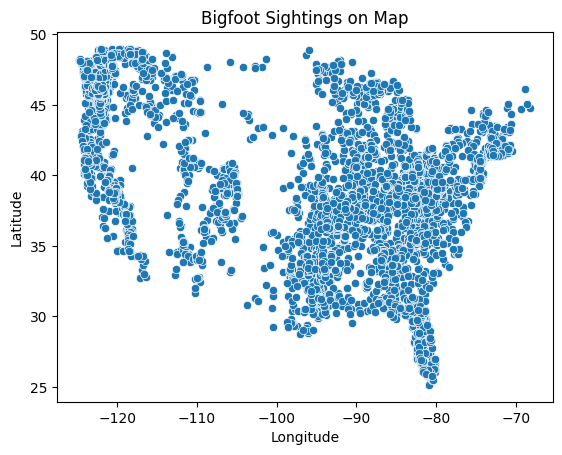

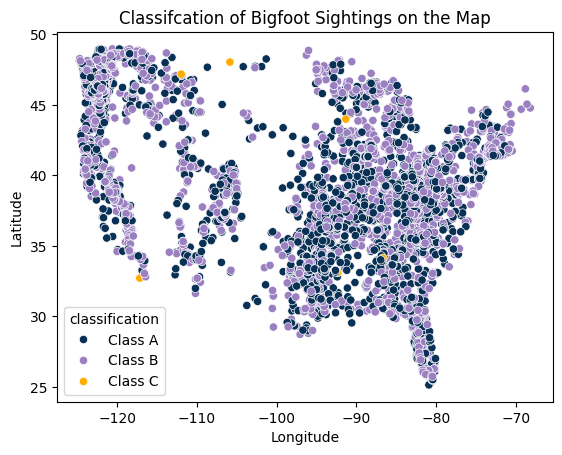

In [ ]:
class_df = df.classification.dropna(how="any")
class_df = df[df["longitude"] >= -130]
class_df.info()

sns.scatterplot(data=class_df, x='longitude', y='latitude')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Bigfoot Sightings on Map")
plt.show()

custom_palette = ['#093156', '#9A80C1', '#FFAC00']
sns.scatterplot(data=class_df, x='longitude', y='latitude', hue="classification", palette=custom_palette)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Classifcation of Bigfoot Sightings on the Map")

plt.show()

    latitude   longitude
0  32.375295  -88.086306
1  46.515013 -120.499664
2  40.656845  -84.642651
3  38.235769 -114.938831
---------------------
Cluster 0 Location: Whitfield, Sumter County, Alabama, United States
Cluster 1 Location: Douglas Lane, Yakima County, Washington, 98939, United States
Cluster 2 Location: SR 707, Mercer County, Ohio, 45898, United States
Cluster 3 Location: Lincoln County, Nevada, United States


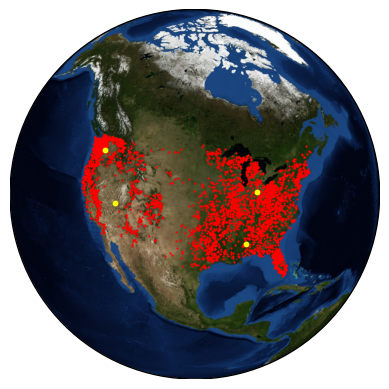

In [ ]:
#Time Class#
class Timestamp:
    def __init__(self, year, month, day):
        self.year = year
        self.month = month
        self.day = day

#Clean data#
bfdf = df.sort_values("longitude")
bfdf = bfdf[bfdf["longitude"] >= -130]
bfclusters = {"latitude":bfdf["latitude"], "longitude":bfdf["longitude"]}
bfclusters = pd.DataFrame(data=bfclusters)

#Whiten data#
yeti = whiten(bfclusters)
sdlatitude = np.std(bfclusters.latitude)
sdlongitude = np.std(bfclusters.longitude)

#Run k-means#
codebook, distortion = kmeans(yeti, 4)
codebookdf = pd.DataFrame(data=codebook, columns=["latitude", "longitude"])

#Un-Whiten Clusters#
codebookdf.latitude = codebookdf.latitude * sdlatitude
codebookdf.longitude = codebookdf.longitude * sdlongitude
print(codebookdf)
print("---------------------")

#Find Location of Cluster#
geolocator = Nominatim(user_agent="bigfoot")
address = []
for i in range(len(codebookdf)):
    point = f"{codebookdf.loc[i, 'latitude']}, {codebookdf.loc[i, 'longitude']}"
    location = geolocator.reverse(point, timeout=10)
    address.append(location.address)
    print(f"Cluster {i} Location: {location.address}")
codebookdf["address"] = address

#Create Graph#
usmap = Basemap(projection="nsper", lon_0=-98,lat_0=41, satellite_height= 4500000)
usmap.figsize=(50, 25)
usmap.bluemarble()
latcoord = list(bfclusters["latitude"])
longcoord = list(bfclusters["longitude"])
usmap.scatter(longcoord, latcoord, marker="x", color="Red", latlon=True, s=0.3)
usmap.scatter(codebookdf.longitude, codebookdf.latitude, marker="o", color="Yellow", latlon=True, s=10)

plt.show()

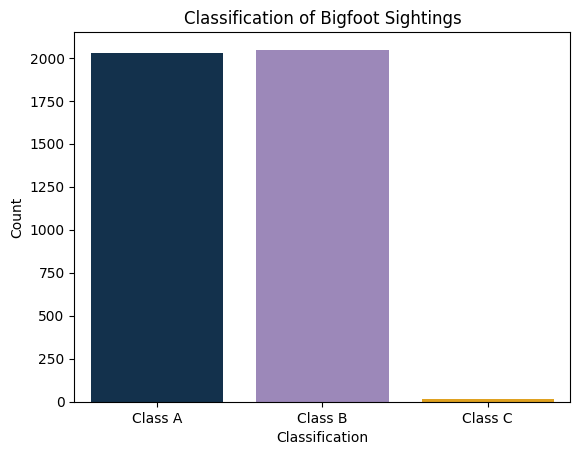

In [ ]:
sns.countplot(x='classification', data=class_df, hue="classification", palette=custom_palette)
plt.xlabel("Classification")
plt.ylabel("Count")
plt.title("Classification of Bigfoot Sightings")
plt.savefig("classification.png", transparent=True)
plt.show()


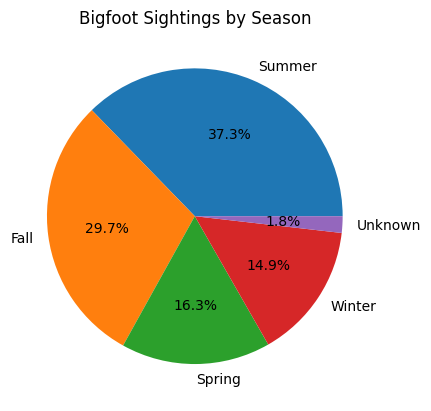

In [ ]:
#bar graph for the season when bigfoot was seen
season_df = df[['season']].dropna(how="any")  # Use double brackets to select the column as a DataFrame
plt.pie(season_df['season'].value_counts(), labels=season_df['season'].value_counts().index, autopct='%1.1f%%')
plt.title('Bigfoot Sightings by Season')
plt.show()

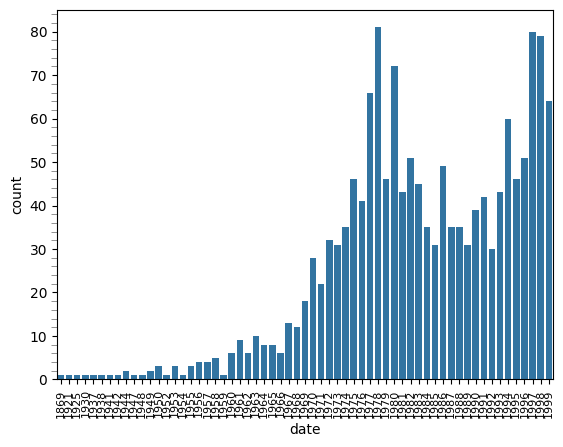

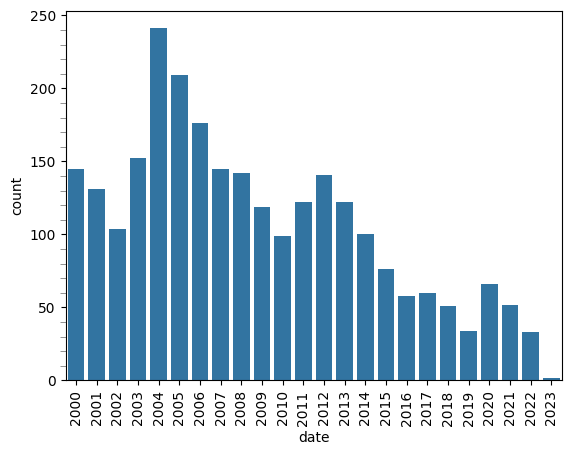

In [ ]:
from datetime import date
from matplotlib.ticker import AutoMinorLocator # this automatically adds minor ticks btwn major tick
#graph showing when bigfoot is seen throughout the years
date_df = df[['date']].dropna(how="any")
# have a new list containing only the year from the date column
date_df['date'] = pd.to_datetime(date_df['date'])
date_df['date'] = date_df['date'].dt.year
date_df

date_df = date_df.groupby('date').size().reset_index(name='count')
date_df

#Data showing only dates from 1869 to 1999
edate_df = date_df[date_df['date'] >= 1869]
edate_df = date_df[date_df['date'] <= 1999]
# and from 2000 to 2023
ndate_df = date_df[date_df['date'] >= 2000]
ndate_df = ndate_df[ndate_df['date'] <= 2023]

#bargraph for 1869-1999
sns.barplot(x='date', y='count', data=edate_df)
plt.xticks(rotation = 90, fontsize = 6)
plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) #the ".gca" = Get current Axes, so you can set minor ticks automatically btwn major ticks
plt.tick_params(axis='y', which='minor', length=4, color='gray')
plt.show()
#bargraph for 2000-2023
sns.barplot(x='date', y='count', data=ndate_df)
plt.xticks(rotation = 90)
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.tick_params(axis='y', which='minor', length=4, color='gray')
plt.show()